# Исследование объявлений о продаже квартир
## Описание проекта
Нужно научиться определять рыночную стоимость объектов недвижимости по данным проекта Яндекс Недвижимость. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# 1. Обзор данных

Изучим данные, предоставленные для исследования. Импортируем необходимые библиотеки и сохраним таблицу в переменную *df*.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/Вильдан/Desktop/Стади/Проекты Я.Практикум/3. Исследовательский анализ данных/real_estate_data.csv', 
                 sep='\t')
# разделитель - знак табуляции

Взглянем на первые 5 строк таблицы.

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Теперь узнаем общую информацию о таблице.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Рассмотрим полученную информацию подробнее.

Всего в таблице 22 столбца разных типов (числовых, строковых и булевых). Большинство столбцов содержат пропущенные значения.

Обратимся к документации к данным для получения информации о столбцах:

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

**Выводы**

Каждая строка таблицы содержит информацию об одной квартире, размещённой для продажи на сервисе объявлений. Наиболее ценным является столбец *last_ptice*, содержащий стоимость квартиры на момент продажи.

С ходу трудно сказать, какие из представленных параметров оказывают наибольшее влияние на стоимость квартиры. В ходе данного исследования нам потребуется это установить.  

Тип данных в столбцах не всегда соответствует нужному, например, для хранения количества водоёмов и парков тип *float64* явно избыточен, а столбцу *is_apartment* лучше назначить булев тип. Много столбцов содержат в себе пропущенные значения. На следующем этапе нужно будет оценить, каким образом лучше их обработать.

# 2. Предобработка данных

Узнаем, сколько пропусков в таблице, вызовом набора методов для суммирования пропущенных значений и проверим, какую долю составляют пропуски в каждом из столбцов.

In [5]:
df.isna().sum() / len(df)

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

В 88 % объявлениях не указана информация, является квартира апартаментами или нет. 
Можно предположить, что в таком случае продаётся обычная квартира, т.к. владелец апартаментов отметил бы тип своего жилья.
Для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Для других типов данных нет подходящего значения на замену. В этом случае правильно оставить эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать.

In [6]:
# заполним отсутствующие значения в столбце с числом балконов
df['balcony'].fillna(0, inplace=True)
# выясним, как распределились апартаменты и неапартаменты среди объявлений с заполненной информацией: 
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Апартаментов в выборке крайне незначительное количество, плюс при отсутствии данного признака у большинства объявлений проводить какой-либо статистический анализ по данному параметру не представляется возможным. Поэтому можно этот столбец вовсе удалить из датафрейма.

In [7]:
# удалим столбец датафрейма методом drop()
df = df.drop('is_apartment', axis=1)
# проверим успех удаления, вызвав список всех колонок атрибутом columns
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'studio', 'open_plan', 'kitchen_area', 'balcony', 'locality_name',
       'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
       'parks_nearest', 'ponds_around3000', 'ponds_nearest',
       'days_exposition'],
      dtype='object')

Посмотрим, в объявлениях из каких населённых пунктов не задано расстояние от квартиры до аэропорта и центра города.

In [8]:
# подсчитаем количество уникальных значений в столбцах 'airports_nearest' и 'cityCenters_nearest' методом value_counts()
print(df[df['airports_nearest'].isna()]['locality_name'].value_counts().head(10))
print(df[df['cityCenters_nearest'].isna()]['locality_name'].value_counts().head(10))

# количество населённых пунктов во всех объявлениях
df['locality_name'].value_counts().head()

посёлок Мурино             522
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    173
деревня Новое Девяткино    144
Сертолово                  142
Кириши                     125
Сланцы                     112
Name: locality_name, dtype: int64
посёлок Мурино             522
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    173
деревня Новое Девяткино    144
Сертолово                  142
Кириши                     125
Сланцы                     112
Name: locality_name, dtype: int64


Санкт-Петербург    15721
посёлок Мурино       522
посёлок Шушары       440
Всеволожск           398
Пушкин               369
Name: locality_name, dtype: int64

В датасете преобладают объявления о продаже квартир из Санкт-Петербурга. А все пропущенные значения в столбцах *airports_nearest* и *cityCenters_nearest* находятся в строках с квартирами не из Питера, а из окрестных населённых пунктов небольших размеров, где, как правило, нет чётко выраженного центра, и, тем более, нет аэропорта. В таком случае правильно оставить эти значения пустыми, как признак отсутствия аэропорта и центра.

Теперь попробуем определить природу пропусков в столбце *days_exposition*. Посмотрим на зависимость количества дней продажи квартиры от даты первого размещения.

In [9]:
# определим, какой период дат рассматривается во всей выборке
print(df['first_day_exposition'].min(), df['first_day_exposition'].max(), sep='\n')
# посмотрим, преобладающие даты размещения объявлений без указания числа дней продажи квартиры
df[df['days_exposition'].isna()]['first_day_exposition'].value_counts()

2014-11-27T00:00:00
2019-05-03T00:00:00


2019-04-22T00:00:00    46
2019-04-18T00:00:00    44
2019-04-04T00:00:00    36
2019-04-08T00:00:00    36
2019-04-29T00:00:00    36
                       ..
2018-09-06T00:00:00     1
2017-10-17T00:00:00     1
2014-12-27T00:00:00     1
2017-05-16T00:00:00     1
2017-07-21T00:00:00     1
Name: first_day_exposition, Length: 708, dtype: int64

В выборке содержатся объявления от конца 2014 года до начала мая 2019. При этом большинство пропусков в столбце *days_exposition* соответствует апрелю 2019 года. Исходя из этого можно сделать вывод, что квартиры из этих объявлений ещё не успели продать на дату выгрузки датасета. В таком случае, можно заполнить пропуски в столбце сигнальным значением "0", который будет указывать на несовершенное состояние сделки.

In [10]:
df['days_exposition'].fillna(0, inplace=True)
len(df[df['days_exposition'].isna()])

0

Большое количество пропусков в стобце с высотой потолков при заполнении единым значением могут дать ошибочную трактовку статистики, поэтому для начала проверим корреляцию цены квартиры с высотой её потолка.

In [11]:
df['ceiling_height'].corr(df['last_price'])

0.08543030982842595

Корреляция минимальна, поэтому смело заменим пустующие значения медианой в зависимости от этажности дома.

In [12]:
ceiling_height_median = df.groupby('floors_total')['ceiling_height'].median()
df['ceiling_height'].fillna(df['floors_total'].map(ceiling_height_median), inplace=True)
# оставшиеся пустые значения заменим общей медианой
df['ceiling_height'].fillna(df['ceiling_height'].median(), inplace=True)
# проверим успешность замены
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
dtype: int64


Пропуски в столбцах *living_area* и *kitchen_area* составляют небольшое количество, их можно заполнить медианными значениями соответствующих площадей.

In [13]:
df['living_area'].fillna(df['living_area'].median(), inplace=True)
df['kitchen_area'].fillna(df['kitchen_area'].median(), inplace=True)


Также, неясна природа весомого количества пропусков в столбцах с ближайшими к квартире водоёмами и парками, учитывая что эти данные собираются автоматически картографическим путём. Причём, данные о расстояниях до водоёмов и парков отсутствуют в двухкратно большем размере, чем данные об имеющихся в радиусе 3 км мест отдыха. Возможно, вкупе с расстояниями до центра и аэропорта, пропуски связаны с техническим сбоем системы выгрузки из ГИС. 

In [14]:
# гипотеза - пропуски в расстояниях до парков и водоёмов связаны с отсутствием в округе парков и водоёмов
print(df[df['parks_around3000'] == 0]['parks_nearest'].isna().sum())
print(df[df['ponds_around3000'] == 0]['ponds_nearest'].isna().sum())
# проверим пропуски в столбцах, полученных автоматическим путём из сервиса картографии, на симметричность
len(df[(df['parks_nearest'].isna()) 
       & (df['ponds_nearest'].isna()) 
       & (df['parks_around3000'].isna()) 
       & (df['ponds_around3000'].isna()) 
       & (df['cityCenters_nearest'].isna())
       & (df['airports_nearest'].isna())
     ]
   )

10102
9071


5518

Выяснили, что большая часть пропусков в столбцах *parks_nearest* и *ponds_nearest* объясняется отсутствием в округе парков и водоёмов. Но вот остальная часть пропусков в данных, полученных из систем ГИС, случайна. На это указывает симметричность отсутствующих данных. Возможно, картографическая система не так хорошо настроена для работы с малыми населёнными пунктами, куда, как мы помним, приходится большинство из 5518 пропусков, в отличие от крупных городов. 

Отсутствующие значения этажности дома заполним путём прибавления одного этажа к текущим этажам квартир. 

In [15]:
df['floors_total'].fillna(df['floor'] + 1, inplace=True)
df['locality_name'].fillna('Неизвестно', inplace=True)

Теперь изменим типы данных в столбцах на более соответствующие. Также, для удобства дальнейшей работы, цену квартир переведём из рублей в миллионы рублей.

In [16]:
# количество этажей и балконов - целые числа, а в столбце first_day_exposition - даты
df['floors_total'] = df['floors_total'].astype('int')
df['balcony'] = df['balcony'].astype('int')
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['last_price'] = df['last_price'] / 1e6
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   studio                23699 non-null  bool          
 10  open_plan             23699 non-null  bool          
 11  kitchen_area          23699 non-null  float64       
 12  balcony               23699 non-null  int32         
 13  locality_name   

Для дальнейшего анализа посчитаем и добавим в таблицу:
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры (первый, последний, другой);
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [17]:
df['sqr_price'] = round(df['last_price'] * 1e6 / df['total_area'], 2)
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year
df['living_part'] = round(df['living_area'] / df['total_area'], 2)
df['kitchen_part'] = round(df['kitchen_area'] / df['total_area'], 2)

# напишем функцию категоризации этажа
def floors_category(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'    
    
# создадим новый столбец с помощью метода apply()
df['floors_category'] = df.apply(floors_category, axis=1)

df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,ponds_around3000,ponds_nearest,days_exposition,sqr_price,weekday_exposition,month_exposition,year_exposition,living_part,kitchen_part,floors_category
0,20,13.000,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,0.0,120370.37,3,3,2019,0.47,0.23,другой
1,7,3.350,40.40,2018-12-04,1,2.75,11,18.6,1,False,...,0.0,NaN,81.0,82920.79,1,12,2018,0.46,0.27,первый
2,10,5.196,56.00,2015-08-20,2,2.55,5,34.3,4,False,...,2.0,574.0,558.0,92785.71,3,8,2015,0.61,0.15,другой
3,0,64.900,159.00,2015-07-24,3,2.60,14,30.0,9,False,...,3.0,234.0,424.0,408176.10,4,7,2015,0.19,0.06,другой
4,2,10.000,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121.0,100000.00,1,6,2018,0.32,0.41,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9.700,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,3.0,381.0,0.0,72490.85,1,3,2017,0.55,0.10,другой
23695,14,3.100,59.00,2018-01-15,3,2.55,5,38.0,4,False,...,NaN,NaN,45.0,52542.37,0,1,2018,0.64,0.14,другой
23696,18,2.500,56.70,2018-02-11,2,2.80,3,29.7,1,False,...,NaN,NaN,0.0,44091.71,6,2,2018,0.52,0.16,первый
23697,13,11.475,76.75,2017-03-28,2,3.00,17,30.0,12,False,...,3.0,196.0,602.0,149511.40,1,3,2017,0.39,0.30,другой


**Выводы**

На этапе предобработки в данных были определены и изучены многочисленные пропуски в столбцах и описаны их предполагаемые причины.

Для некоторых пропущенных значений была предложена логичная замена. Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски были заменены на 0.

Для других типов данных нет подходящего значения на замену, например, для данных, полученных из картографических систем по малым населённым пунктам. С учётом занимаемой доли пропусков среди всех данных правильно оставить эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать.

Кроме того, на этапе предобработки данные в столбцах были приведены к нужным типам; посчитаны и созданы дополнительные столбцы в датафрейме, которые понадобятся на следующих исследовательских этапах.

# 3. Ход исследования
## 3.1 Изучение основных параметов. Обработка редких и выбивающихся значений

Первым делом изучим следующие параметры квартир: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64
Axes(0.125,0.11;0.775x0.77)


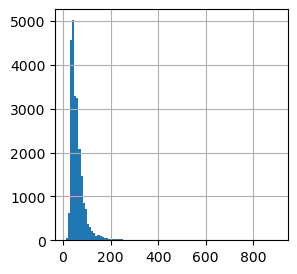

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64
Axes(0.125,0.11;0.775x0.77)


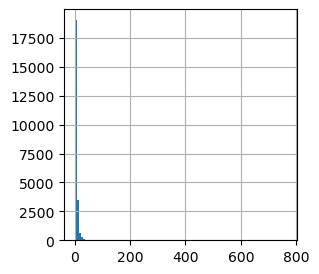

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64
Axes(0.125,0.11;0.775x0.77)


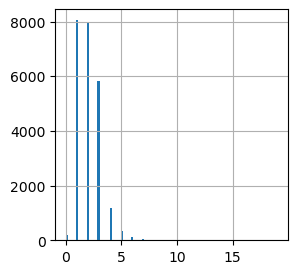

count    23699.000000
mean         2.735650
std          0.994275
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64
Axes(0.125,0.11;0.775x0.77)


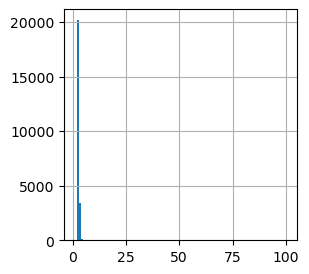

In [18]:
columns = ['total_area', 'last_price', 'rooms', 'ceiling_height']
for col in columns:
    print(df[col].describe())
    print(df[col].hist(bins=100, figsize=(3,3)))
    plt.show()

По гистограмме видно, что во всех параметрах есть сильно выбивающиеся значения. Кто-то продаёт дворец размером 900 квадратных метров. Скорее всего, это в нём 19 комнат и стометровые потолки:)
Посмотрим получше на каждую гистограмму отдельно.

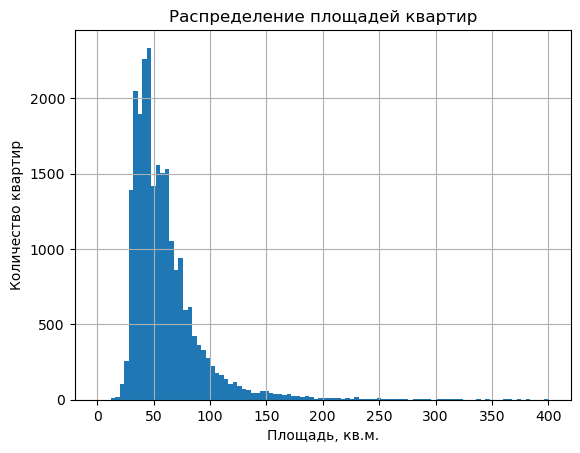

In [19]:
# построение гистограммы с помощью метода hist()
df['total_area'].hist(bins=100, range=(0,400))
plt.title("Распределение площадей квартир")
plt.xlabel("Площадь, кв.м.")
plt.ylabel("Количество квартир");

Наиболее часто продаются квартиры площадью до 50 кв.м. Но имеются и уникальные случаи метражом в 200-400 квадратных метров.

Теперь построим гистограмму распределения стоимостей квартир.

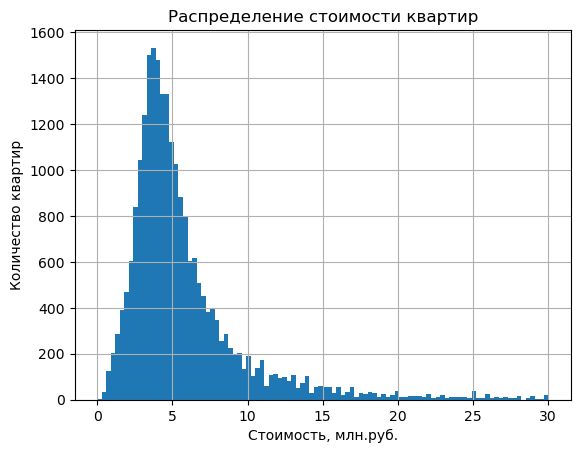

In [20]:
df['last_price'].hist(bins=100, range=(0, 30))
plt.title("Распределение стоимости квартир")
plt.xlabel("Стоимость, млн.руб.")
plt.ylabel("Количество квартир");

Ярко выраженный пик гистограммы приходится на цену порядка 3 миллионов. Да уж, в 2023 на эти цены смотрим и плачем..

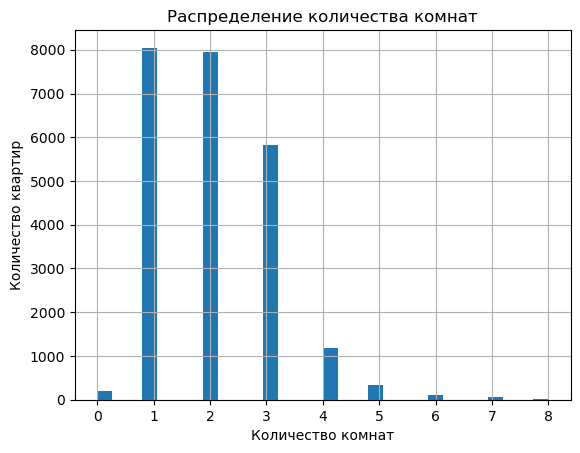

In [21]:
df.rooms.hist(bins=30, range=(0, 8))
plt.title("Распределение количества комнат")
plt.xlabel("Количество комнат")
plt.ylabel("Количество квартир");

Преобладают однокомнатные и двухкомнатные квартиры. Также, не сильно отстают "трёшки". А вот остальные планировки куда менее популярны в объявлениях.

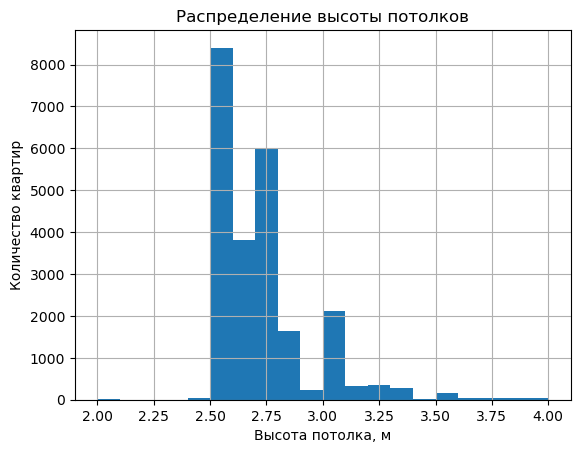

In [22]:
df.ceiling_height.hist(bins=20, range = (2, 4))
plt.title("Распределение высоты потолков")
plt.xlabel("Высота потолка, м")
plt.ylabel("Количество квартир");

Предсказуемо пики в районе общей медианы. Помним, что мы заменили ей пустые значения, поэтому гистограмма можеть давать чуть искажённый результат. Но в случае с высотой потолков интуиитивно понятно, что практически во всех квартирах она будет одинакова и составлять 2,6-2,8 м.

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


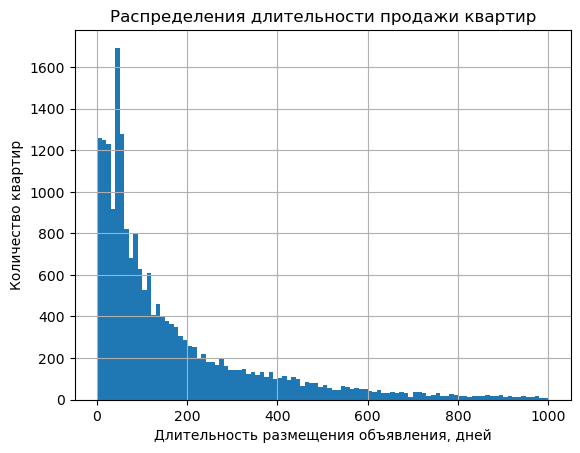

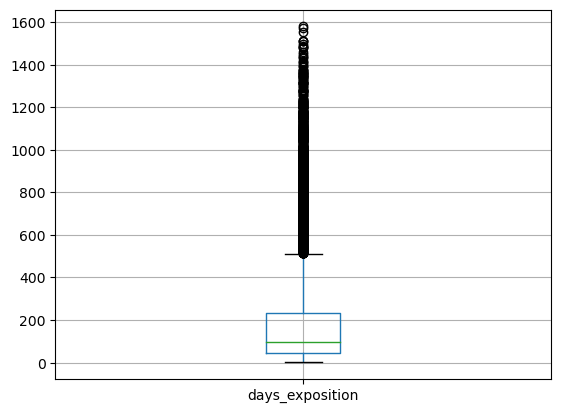

In [23]:
# ограничим выборку больше нуля, т.к. значение "0" сигнализирует о несостоявшемся статусе сделки по продаже квартиры
print(df.query('days_exposition > 0')['days_exposition'].describe())
df['days_exposition'].hist(bins=100, range=(1, 1000))
plt.title("Распределения длительности продажи квартир")
plt.xlabel("Длительность размещения объявления, дней")
plt.ylabel("Количество квартир")
plt.show()
# дополнительно построим диаграмму размаха с помощью метода boxplot() библиотеки mathplotlib
df.query('days_exposition > 0').boxplot(column=['days_exposition']);

Здесь также имеются выдающиеся значения, самое долгое время продажи - около 5 лет! Из-за влияния таких единичных случаев, среднее арифметическое сильно больше медианы. В таком случае, медиана покажет более приближенный к реальному результат. Медианное время продажи квартиры - 3 месяца.

По диаграмме размаха видно (и гистограмма это только подтверждает), что основная часть продаж совершается за время не более 200-220 дней. Все продажи, которые остаются за "усами коробки" (т.е. совершаются дольше 500 дней), можно считать необычно долгими и отбросить из выборки.
Что касается нижней отметки, первый квартиль находится на 45 днях. Тут сложнее отсечь быстрые продажи, нужно дополнительное изучение данных.

Теперь построим диаграммы размаха по всем рассматриваемым параметрам.

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64
Axes(0.125,0.11;0.775x0.77)


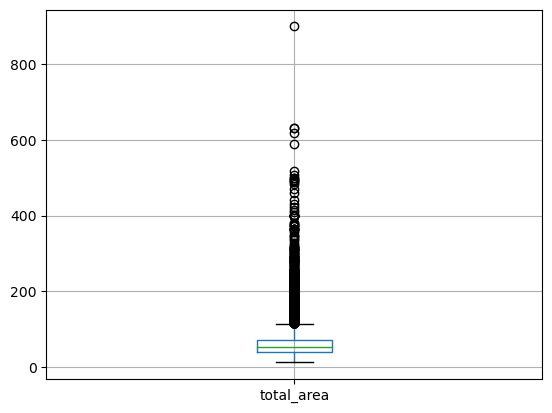

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64
Axes(0.125,0.11;0.775x0.77)


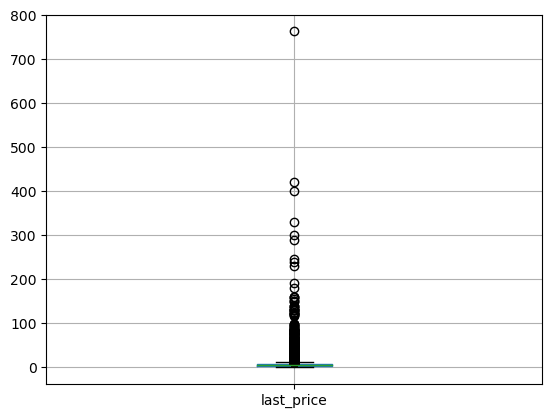

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64
Axes(0.125,0.11;0.775x0.77)


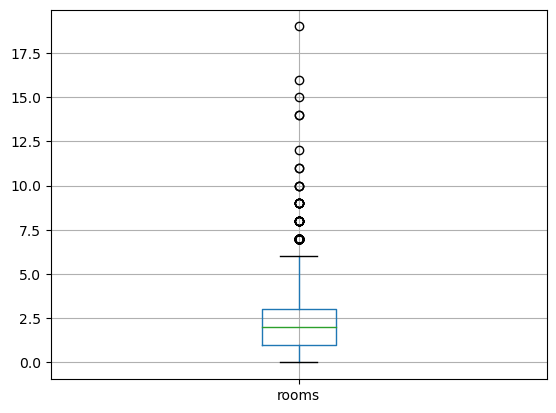

count    23699.000000
mean         2.735650
std          0.994275
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64
Axes(0.125,0.11;0.775x0.77)


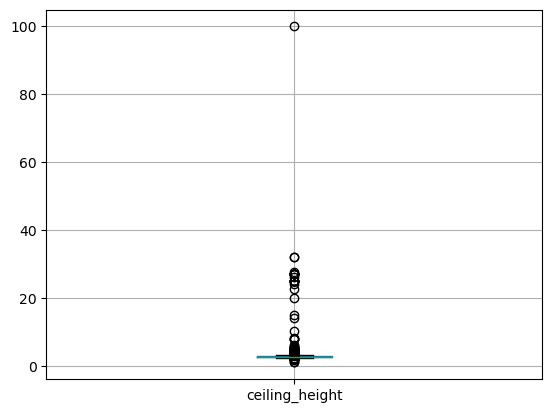

In [24]:
columns = ['total_area', 'last_price', 'rooms', 'ceiling_height']
for col in columns:
    print(df[col].describe())
    print(df.boxplot(column=[col]))
    plt.show()

В колонках *last_price* и *ceiling_height* есть большие выбросы, из-за которых даже "ящик" на графике не разобрать, не то что "усы". Исправим это введением ограничений:

Axes(0.125,0.11;0.775x0.77)


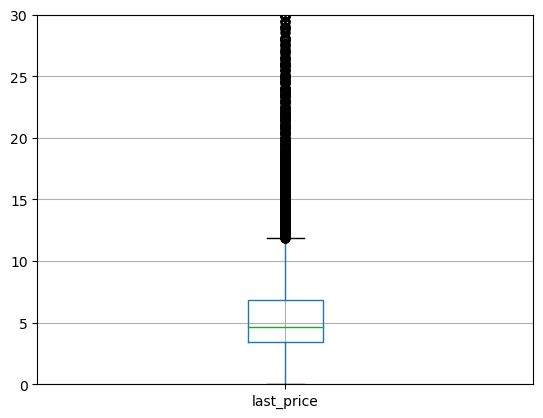

Axes(0.125,0.11;0.775x0.77)


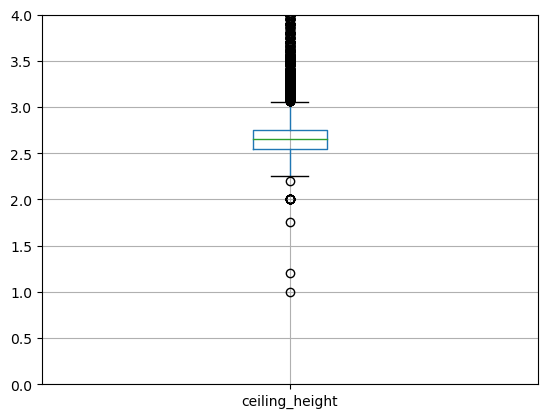

In [25]:
print(df.boxplot(column=['last_price']))
plt.ylim(0, 30)
plt.show()
print(df.boxplot(column=['ceiling_height']))
plt.ylim(0, 4)
plt.show()

Теперь всё нагляднее: основная часть квартир продается за цену от 3 до 7 миллионов, квартиры дороже 12 миллионов - статистические выбросы. 

Чётко видны и ограничения по высоте потолков: меньше 2,2 м (детские садики:)?) и больше 3,2 м можно смело не учитывать в исследовании.

Соберём все ограничения воедино в очищенный датафрейм *good_data*:

In [26]:
print(df.info())
good_data = df[(df['days_exposition'] < 500)
             & (df['total_area'] < 120)
             & (df['last_price'] < 12)
             & (df['rooms'] < 6)
             & (df['ceiling_height'] > 2.2)
             & (df['ceiling_height'] < 3.2)].reset_index(drop=True)
good_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   studio                23699 non-null  bool          
 10  open_plan             23699 non-null  bool          
 11  kitchen_area          23699 non-null  float64       
 12  balcony               23699 non-null  int32         
 13  locality_name   

Супер! Избавились от плохих значений и при этом сохранили более 80 % первоначальных данных. 

## 3.2 Какие факторы больше всего влияют на стоимость квартиры?

Определим факторы, больше всего влияющие на стоимость квартиры:

* оценим степень влияния площади, числа комнат и удаленности от центра на стоимость

* оценим степень влияния этажа квартиры на её цену

* изучим зависимость цены от даты размещения.

Посмотрим, зависит ли цена от площади, числа комнат, удалённости от центра, и насколько сильна эта зависимость.

In [27]:
print(good_data['last_price'].corr(good_data['total_area']))
print(good_data['last_price'].corr(good_data['rooms']))
print(good_data['last_price'].corr(good_data['cityCenters_nearest']))

0.6886569628008266
0.4260841976386598
-0.31580388374993806


Зависимость цены от площади квартиры предсказуемо сильная, также видна корреляция и с остальными параметрами. Убедимся в этом при помощи графиков.

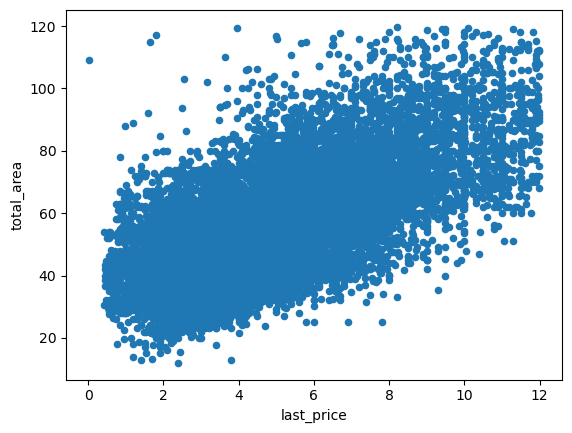

In [28]:
# построение диаграммы рассеяния (тип - 'scatter')
good_data.plot(x='last_price', y='total_area', kind='scatter');

Тренд очевиден, но точки сливаются в единую массу, лучше в таком случае построить ячеечную диаграмму.

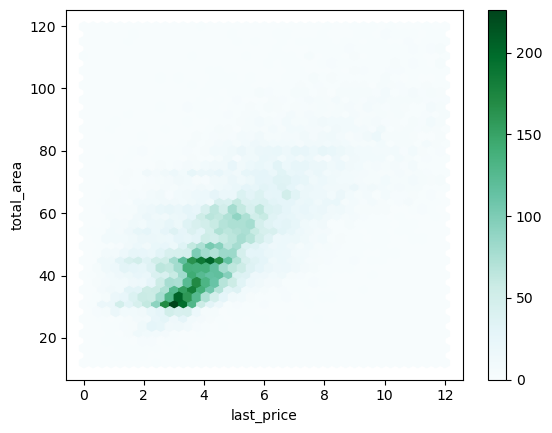

In [29]:
# построение ячеечной диаграммы - графика, разделённого на шестиугольные области
good_data.plot(x='last_price', y='total_area', kind='hexbin', gridsize=40);

С возрастанием площади квартиры растёт и её цена. Наиболее темные соты на диаграмме отражают наиболее часто встречаемые значения - стоимость от 2 до 5 млн.руб. и площадь от 30 до 45 кв.м.

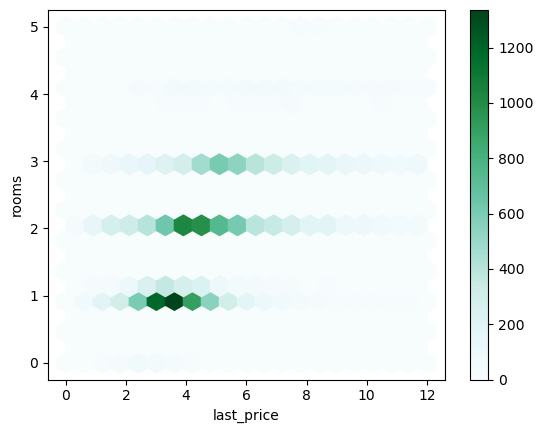

In [30]:
good_data.plot(x='last_price', y='rooms', kind='hexbin', gridsize=20);

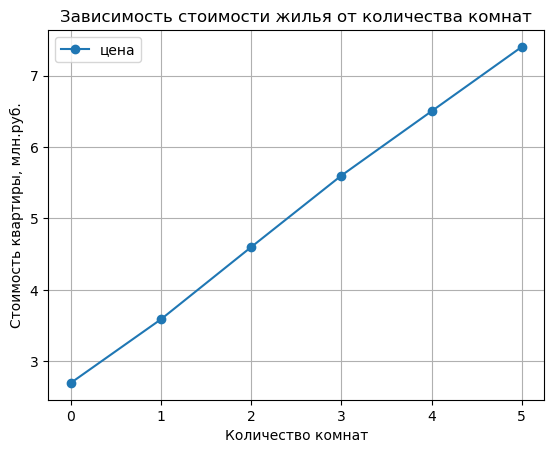

In [31]:
# для большей наглядности построим линейный график
room_pivot_data = pd.DataFrame(good_data.pivot_table(index='rooms', values='last_price', aggfunc='median').reset_index())
room_pivot_data.columns = ['rooms', 'median_price']
room_pivot_data.plot(x='rooms', y='median_price', style='o-', grid = True, label='цена')
plt.title("Зависимость стоимости жилья от количества комнат")
plt.xlabel("Количество комнат")
plt.ylabel("Стоимость квартиры, млн.руб.");

Всё просто: чем больше комнат - тем выше цена.

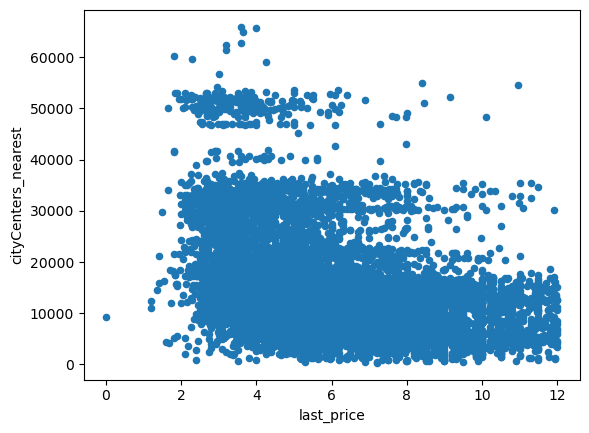

In [32]:
good_data.plot(x='last_price', y='cityCenters_nearest', kind='scatter');

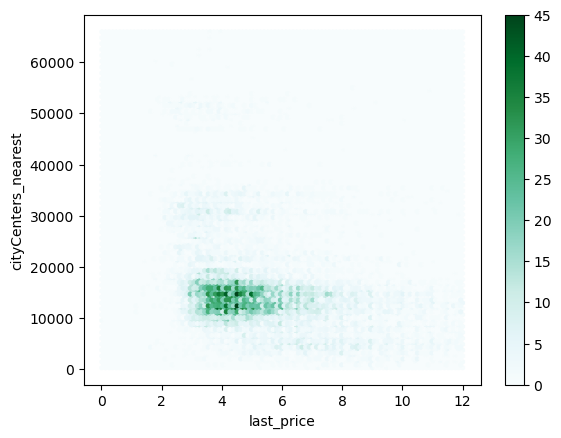

In [33]:
good_data.plot(x='last_price', y='cityCenters_nearest', kind='hexbin', gridsize=100);

Чем дальше от центра - тем ниже цена. Зависимость ярко выражена при удалении квартиры от центра более, чем на 20 км. В данном случае, скорее всего, речь идёт о пригородах городов.

Теперь посмотрим на зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.

In [34]:
good_data.pivot_table(index='floors_category', values='last_price', aggfunc=('mean', 'median', 'count'))

,count,mean,median
floors_category,,,
другой,14421,4.937365,4.50
первый,2475,3.998977,3.70
последний,2628,4.322647,3.95


Медианная стоимость квартир на первом этаже - минимальная (впрочем, как и среднеарифметическая). Квартиры на последнем этаже тоже ценятся меньше, чем на остальных этажах.

Изучим зависимость цены квартиры от даты размещения объявления.

In [35]:
weekday_pivot_table = good_data.pivot_table(index='weekday_exposition', values='last_price', 
                                                         aggfunc=('mean', 'median', 'count')).reset_index()
weekday_pivot_table.columns = ['weekday', 'total', 'mean', 'median_price']
weekday_pivot_table

,weekday,total,mean,median_price
0,0,2985,4.756617,4.35
1,1,3435,4.769549,4.35
2,2,3247,4.741533,4.35
3,3,3454,4.742570,4.30
4,4,3343,4.723049,4.30
5,5,1621,4.648021,4.30
6,6,1439,4.709546,4.32


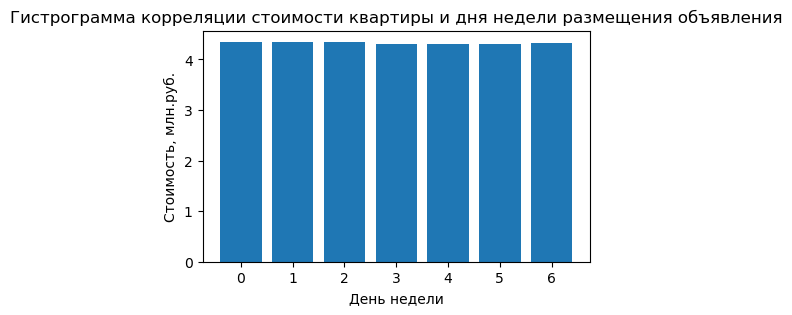

In [36]:
plt.figure(figsize=(5,3))
plt.bar(weekday_pivot_table.weekday, weekday_pivot_table.median_price)
plt.title("Гистрограмма корреляции стоимости квартиры и дня недели размещения объявления")
plt.xlabel("День недели")
plt.ylabel("Стоимость, млн.руб.");

In [37]:
month_pivot_table = good_data.pivot_table(index='month_exposition', values='last_price', 
                                                         aggfunc=('mean', 'median', 'count')).reset_index()
month_pivot_table.columns = ['month', 'total', 'mean', 'median_price']
month_pivot_table

,month,total,mean,median_price
0,1,1238,4.720900,4.3250
1,2,2210,4.742731,4.3095
2,3,2095,4.711796,4.3500
3,4,1998,4.873901,4.5000
4,5,1002,4.712209,4.3000
5,6,1422,4.519192,4.1500
6,7,1384,4.719548,4.3000
7,8,1458,4.734904,4.3000
8,9,1626,4.756123,4.3000
9,10,1807,4.721951,4.3000


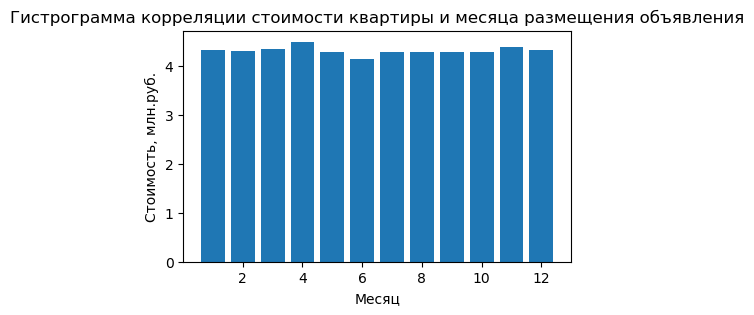

In [38]:
plt.figure(figsize=(5,3))
plt.bar(month_pivot_table.month, month_pivot_table.median_price)
plt.title("Гистрограмма корреляции стоимости квартиры и месяца размещения объявления")
plt.xlabel("Месяц")
plt.ylabel("Стоимость, млн.руб.");

In [39]:
year_pivot_table = good_data.pivot_table(index='year_exposition', values='last_price', 
                                                         aggfunc=('mean', 'median', 'count')).reset_index()
year_pivot_table.columns = ['year', 'total', 'mean', 'median_price']
year_pivot_table

,year,total,mean,median_price
0,2014,7,6.491429,7.50000
1,2015,436,4.863358,4.42450
2,2016,1891,4.666083,4.20000
3,2017,6997,4.674908,4.20000
4,2018,7668,4.697983,4.30000
5,2019,2525,5.043658,4.75494


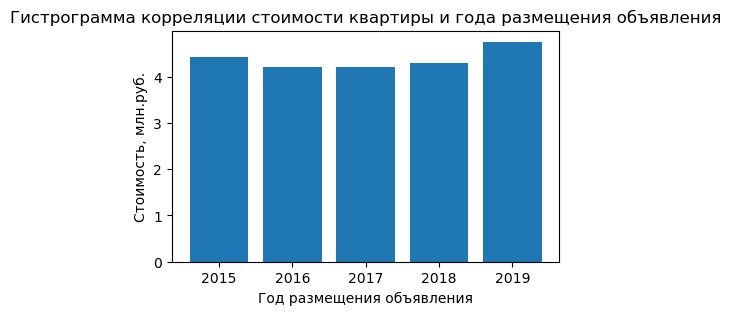

In [40]:
# За 2014г.в датасете есть всего 7 объявлений о продаже квартир, поэтому перед визуализацией уберём эти данные из выборки
plt.figure(figsize=(5,3))
plt.bar(year_pivot_table.query('year > 2014').year, year_pivot_table.query('year > 2014').median_price)
plt.title("Гистрограмма корреляции стоимости квартиры и года размещения объявления")
plt.xlabel("Год размещения объявления")
plt.ylabel("Стоимость, млн.руб.");

Результаты вычислений показывают, что особой разницы нет, в какой день недели или месяц размещать объявление о продаже квартиры, продастся она всё равно примерно за одну и ту же цену.
Несмотря на то, что с 2015 по 2016 гг. медианная цена квартир снизилась (этот факт может обуславливаться небольшой выборкой квартир за 2015 г., по сравнению с остальными) в разрезе лет, очевидно, квартиры дорожают. 

**Выводы**

Зависимость цены от площади квартиры предсказуемо сильная. С возрастанием площади квартиры растёт и её цена. Убедились в этом с помощью определения коэффициента корреляции Пирсона и дополнительно подкрепили уверенность графиками и диаграммами.

Чем дальше от центра - тем ниже стоимость квартиры. Зависимость становится сильно выраженной при удалении квартиры от центра более, чем на 20 км. В данном случае, скорее всего, речь идёт о пригородах городов, где цены заметно уступают городским.

В среднем квартиры на первом этаже продаются дешевле остальных. Квартиры на последнем этаже тоже ценятся меньше, чем на других этажах.

Зависимость цены продажи квартиры от даты размещения объявления не наблюдается. За исключение года размещения - очевидно, с каждым годом квартиры становятся дороже (как минимум на уровень инфляции).

## 3.3 Аналитика для крупнейших населённых пунктов

Посмотрим, в каких городах и посёлках продаются больше всего квартир:

In [41]:
top10_location = good_data['locality_name'].value_counts().head(10).reset_index()
top10_location.columns = ['locality_name', 'count']
top10_location

,locality_name,count
0,Санкт-Петербург,12267
1,посёлок Мурино,488
2,посёлок Шушары,415
3,Всеволожск,359
4,Колпино,314
5,посёлок Парголово,311
6,Пушкин,302
7,Гатчина,275
8,деревня Кудрово,265
9,Выборг,205


Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья. 

In [42]:
top10_location_data= good_data.query('locality_name in @top10_location.locality_name').pivot_table(index='locality_name', 
                                                                              values=['last_price', 'sqr_price'],
                                                                              aggfunc='median')
top10_location_data.columns = ['median_price', 'median_sqr_price']
top10_location_data.sort_values(by='median_sqr_price', ascending=False)

,median_price,median_sqr_price
locality_name,,
Санкт-Петербург,5.000,102061.860
Пушкин,4.925,98454.745
деревня Кудрово,3.790,92000.000
посёлок Парголово,4.100,91428.570
посёлок Мурино,3.369,86250.375
посёлок Шушары,3.990,76666.670
Колпино,3.600,74689.875
Гатчина,3.080,67695.960
Всеволожск,3.480,65540.540


Самые высокие цены на жилье и в среднем максимальная стоимость квадратного метра в Санкт-Петербурге. Из топ-10 населённых пунктов самые дешёвые квартиры можно купить в Выборге. 

### Особенности недвижимости центра Санкт-Петербурга

Здесь мы выявим, какие квартиры относятся к центральному району Санкт-Петерубрга и проанализируем предложения по ним.

Для начала выясним, какую область Санкт-Петербурга можно считать центром. Выделим квартиры из этого города и создадим столбец с расстоянием до центра в километрах, округлив до целых значений. После этого посчитаем среднюю цену для каждого километра и построим график зависимости цены квартиры от удалённости от центра.

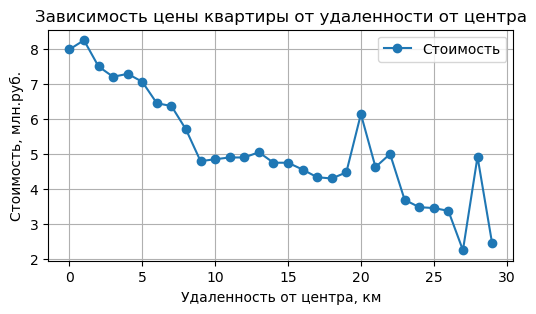

In [43]:
spb_data = good_data.query('locality_name == "Санкт-Петербург" and not cityCenters_nearest.isna()').reset_index(drop=True)
spb_data['cityCenters_nearest_km'] = (spb_data['cityCenters_nearest'] / 1000).astype('int')
spb_data_pivot_table = spb_data.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc=['median']).reset_index()
spb_data_pivot_table.columns = ['cityCenters_nearest_km', 'median_price']
spb_data_pivot_table.plot(style='-o', grid=True, x='cityCenters_nearest_km', y='median_price', label='Стоимость', figsize=(6,3))
plt.title("Зависимость цены квартиры от удаленности от центра")
plt.xlabel("Удаленность от центра, км")
plt.ylabel("Стоимость, млн.руб.");

Граница на графике, где сильно меняется тренд стоимости, находится в районе 9 км. Исходя из этого, примем, что центральный район Санкт-Петербурга на карте - круг радиусом в 9 км.

Выделим сегмент квартир в центре:

In [44]:
spb_center_data = spb_data.query('cityCenters_nearest_km <= 9').reset_index(drop=True)
spb_center_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2791 entries, 0 to 2790
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            2791 non-null   int64         
 1   last_price              2791 non-null   float64       
 2   total_area              2791 non-null   float64       
 3   first_day_exposition    2791 non-null   datetime64[ns]
 4   rooms                   2791 non-null   int64         
 5   ceiling_height          2791 non-null   float64       
 6   floors_total            2791 non-null   int32         
 7   living_area             2791 non-null   float64       
 8   floor                   2791 non-null   int64         
 9   studio                  2791 non-null   bool          
 10  open_plan               2791 non-null   bool          
 11  kitchen_area            2791 non-null   float64       
 12  balcony                 2791 non-null   int32   

Проанализируем центральный район города, а именно параметры квартир: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

count    2791.000000
mean       58.757549
std        20.530928
min        12.000000
25%        43.000000
50%        56.000000
75%        72.000000
max       119.000000
Name: total_area, dtype: float64
Axes(0.125,0.11;0.775x0.77)


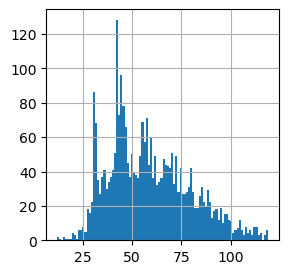

count    2791.000000
mean        6.606820
std         2.308631
min         0.012190
25%         4.750000
50%         6.400000
75%         8.299500
max        11.999000
Name: last_price, dtype: float64
Axes(0.125,0.11;0.775x0.77)


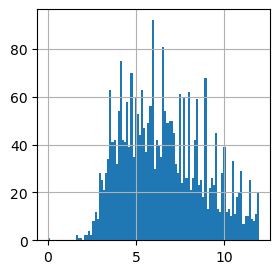

count    2791.000000
mean        2.089215
std         0.924921
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64
Axes(0.125,0.11;0.775x0.77)


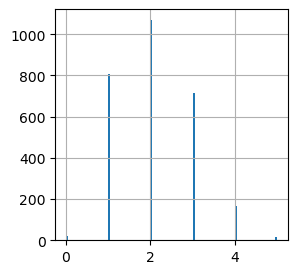

count    2791.000000
mean        2.757553
std         0.198063
min         2.400000
25%         2.550000
50%         2.720000
75%         3.000000
max         3.180000
Name: ceiling_height, dtype: float64
Axes(0.125,0.11;0.775x0.77)


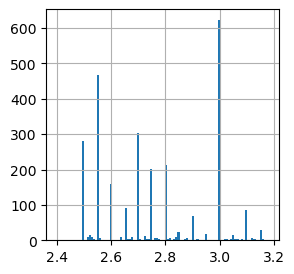

In [45]:
columns = ['total_area', 'last_price', 'rooms', 'ceiling_height']
for col in columns:
    print(spb_center_data[col].describe())
    print(spb_center_data[col].hist(bins=100, figsize=(3,3)))
    plt.show()

Посмотрим получше на каждую гистограмму отдельно.

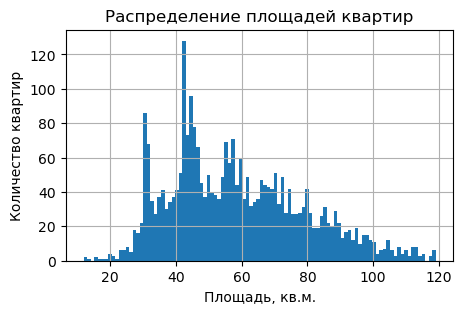

In [46]:
# построение гистограммы с помощью метода hist()
spb_center_data['total_area'].hist(bins=100, figsize=(5,3))
plt.title("Распределение площадей квартир")
plt.xlabel("Площадь, кв.м.")
plt.ylabel("Количество квартир");

Наиболее часто продаются квартиры площадью 40-60 кв.м. Впрочем, как и везде.

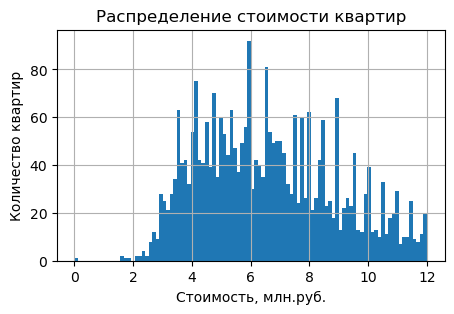

In [47]:
spb_center_data['last_price'].hist(bins=100, figsize=(5,3))
plt.title("Распределение стоимости квартир")
plt.xlabel("Стоимость, млн.руб.")
plt.ylabel("Количество квартир");

А вот по ценам отличие весомое: квартиры в центре Санкт-Петербурга в среднем продаются вдвое дороже остальных квартир в выборке.

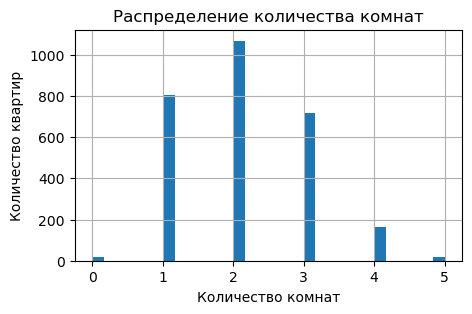

In [48]:
spb_center_data.rooms.hist(bins=30, figsize=(5,3))
plt.title("Распределение количества комнат")
plt.xlabel("Количество комнат")
plt.ylabel("Количество квартир");

Преобладают однокомнатные и двухкомнатные квартиры. Также, не сильно отстают "трёшки". Тут центр никак не выделяется.

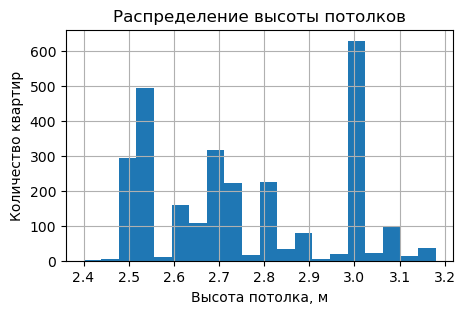

In [49]:
spb_center_data.ceiling_height.hist(bins=20, figsize=(5,3))
plt.title("Распределение высоты потолков")
plt.xlabel("Высота потолка, м")
plt.ylabel("Количество квартир");

Как можно увидеть, в центре Петербурга сильно распространены квартиры с трёхметровыми потолками. Это весомое отличие от общей выборки квартир из датасета (2,6-2,8 м).

Теперь построим диаграммы размаха по всем рассматриваемым параметрам.

count    2791.000000
mean       58.757549
std        20.530928
min        12.000000
25%        43.000000
50%        56.000000
75%        72.000000
max       119.000000
Name: total_area, dtype: float64
Axes(0.125,0.11;0.775x0.77)


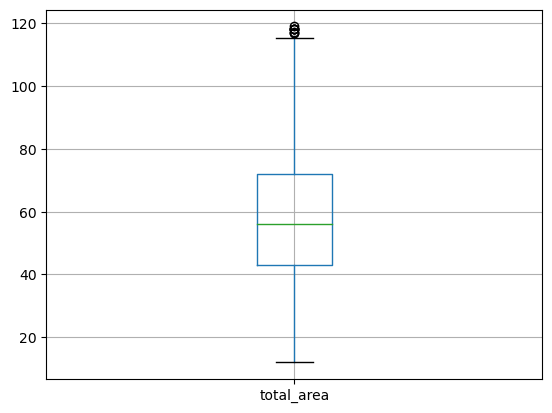

count    2791.000000
mean        6.606820
std         2.308631
min         0.012190
25%         4.750000
50%         6.400000
75%         8.299500
max        11.999000
Name: last_price, dtype: float64
Axes(0.125,0.11;0.775x0.77)


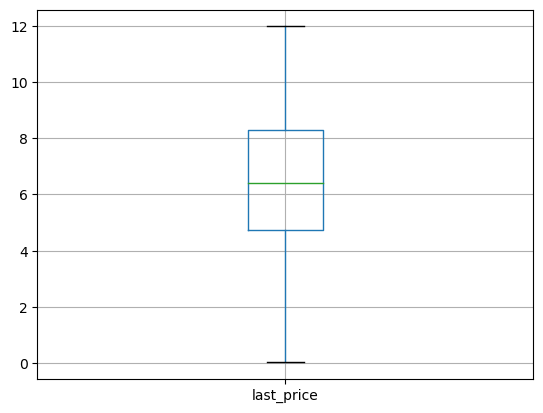

count    2791.000000
mean        2.089215
std         0.924921
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64
Axes(0.125,0.11;0.775x0.77)


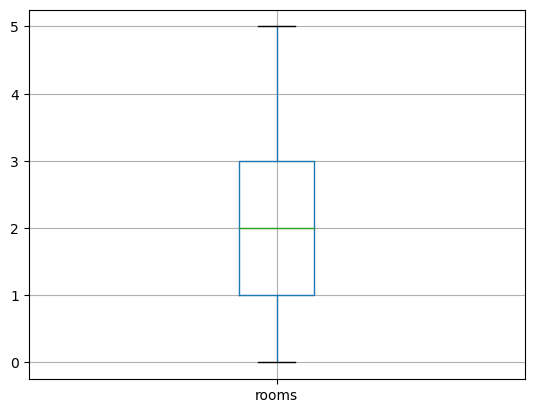

count    2791.000000
mean        2.757553
std         0.198063
min         2.400000
25%         2.550000
50%         2.720000
75%         3.000000
max         3.180000
Name: ceiling_height, dtype: float64
Axes(0.125,0.11;0.775x0.77)


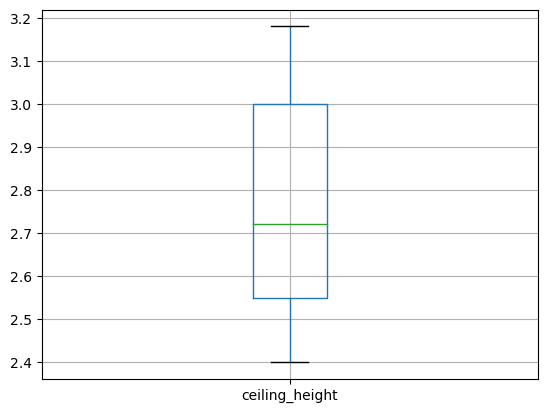

In [50]:
columns = ['total_area', 'last_price', 'rooms', 'ceiling_height']
for col in columns:
    print(spb_center_data[col].describe())
    print(spb_center_data.boxplot(column=[col]))
    plt.show()

Благодаря тому, что мы в предыдущих разделах почистили данные от выбросов, диаграммы выглядят очень красиво. 

Диаграммы размаха подтверждают предыдущие выводы.

Определим факторы, больше всего влияющие на стоимость квартиры в центре:

* оценим степень влияния площади, числа комнат и удаленности от центра на стоимость

* оценим степень влияния этажа квартиры на её цену

* изучим зависимость цены от даты размещения.

Посмотрим, зависит ли цена от площади, числа комнат, удалённости от центра, и насколько сильна эта зависимость.

In [51]:
print(spb_center_data['last_price'].corr(spb_center_data['total_area']))
print(spb_center_data['last_price'].corr(spb_center_data['rooms']))
print(spb_center_data['last_price'].corr(spb_center_data['cityCenters_nearest']))

0.7554511526122939
0.49793120088049836
-0.3293547864642883


Зависимость цены от площади квартиры стала ещё сильнее, чем обычно. Корреляция с остальными параметрами тоже имеется, но не настолько сильная. Убедимся в этом при помощи графиков.

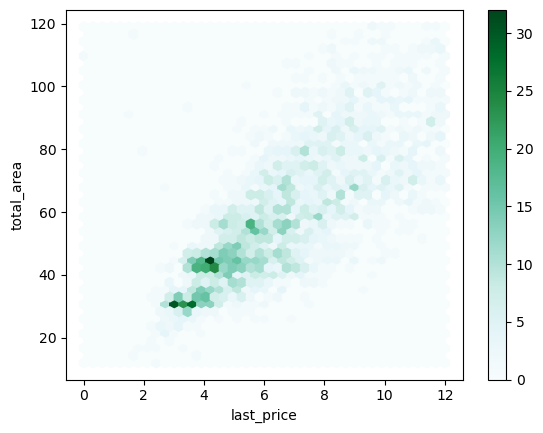

In [52]:
# построение ячеечной диаграммы - графика, разделённого на шестиугольные области
spb_center_data.plot(x='last_price', y='total_area', kind='hexbin', gridsize=40);

С возрастанием площади квартиры растёт и её цена. Наиболее темные соты на диаграмме отражают наиболее часто встречаемые значения - стоимость от 3 до 6 млн.руб. и площадь от 30 до 50 кв.м.

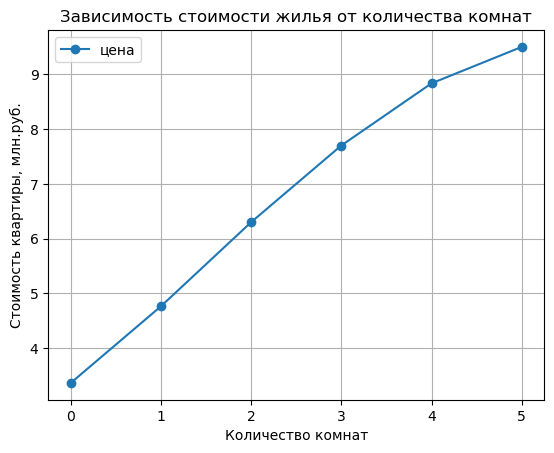

In [53]:
room_pivot_data = pd.DataFrame(spb_center_data.pivot_table(index='rooms', values='last_price', aggfunc='median').reset_index())
room_pivot_data.columns = ['rooms', 'median_price']
room_pivot_data.plot(x='rooms', y='median_price', style='o-', grid = True, label='цена')
plt.title("Зависимость стоимости жилья от количества комнат")
plt.xlabel("Количество комнат")
plt.ylabel("Стоимость квартиры, млн.руб.");

Всё просто: чем больше комнат - тем выше цена.

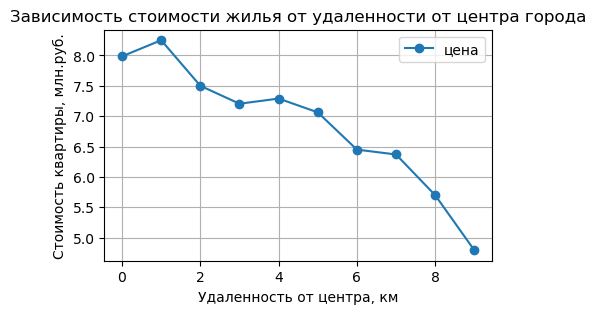

In [54]:
room_pivot_data = pd.DataFrame(spb_center_data.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='median').reset_index())
room_pivot_data.columns = ['cityCenters_nearest_km', 'median_price']
room_pivot_data.plot(x='cityCenters_nearest_km', y='median_price', style='o-', grid = True, label='цена', figsize=(5,3))
plt.title("Зависимость стоимости жилья от удаленности от центра города")
plt.xlabel("Удаленность от центра, км")
plt.ylabel("Стоимость квартиры, млн.руб.");

Чем дальше от центра - тем ниже цена. Даже в самом центре есть более центровой центр:)

Теперь посмотрим на зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.

In [55]:
spb_center_data.pivot_table(index='floors_category', values='last_price', aggfunc=('mean', 'median', 'count'))

,count,mean,median
floors_category,,,
другой,1989,6.768200,6.550
первый,352,5.725206,5.375
последний,450,6.583140,6.300


Здесь без изменений. Медианная стоимость квартир на первом этаже - минимальная. Квартиры на последнем этаже тоже ценятся меньше, чем на остальных этажах. Различие от квартир не в центре лишь в цене (высокой, в данном случае).

Изучим зависимость цены квартиры от даты размещения объявления.

In [56]:
weekday_pivot_table = spb_center_data.pivot_table(index='weekday_exposition', values='last_price', 
                                                         aggfunc=('mean', 'median', 'count')).reset_index()
weekday_pivot_table.columns = ['weekday', 'total', 'mean', 'median_price']
weekday_pivot_table

,weekday,total,mean,median_price
0,0,419,6.678295,6.450
1,1,486,6.520871,6.325
2,2,454,6.580489,6.282
3,3,530,6.555566,6.300
4,4,493,6.629305,6.450
5,5,223,6.635163,6.600
6,6,186,6.787133,6.510


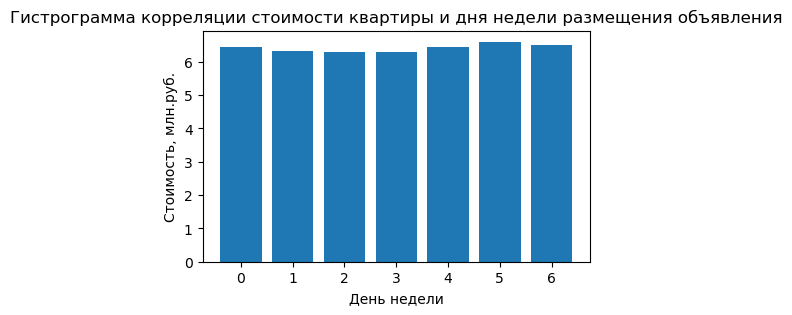

In [57]:
plt.figure(figsize=(5,3))
plt.bar(weekday_pivot_table.weekday, weekday_pivot_table.median_price)
plt.title("Гистрограмма корреляции стоимости квартиры и дня недели размещения объявления")
plt.xlabel("День недели")
plt.ylabel("Стоимость, млн.руб.");

In [58]:
month_pivot_table = spb_center_data.pivot_table(index='month_exposition', values='last_price', 
                                                         aggfunc=('mean', 'median', 'count')).reset_index()
month_pivot_table.columns = ['month', 'total', 'mean', 'median_price']
month_pivot_table

,month,total,mean,median_price
0,1,167,6.639128,6.5000
1,2,321,6.473249,6.2000
2,3,303,6.651678,6.3000
3,4,292,6.669892,6.3500
4,5,170,6.519972,6.5000
5,6,210,6.260553,6.1950
6,7,212,6.572768,6.3750
7,8,206,6.848580,6.6375
8,9,225,6.815342,6.4000
9,10,250,6.539732,6.3750


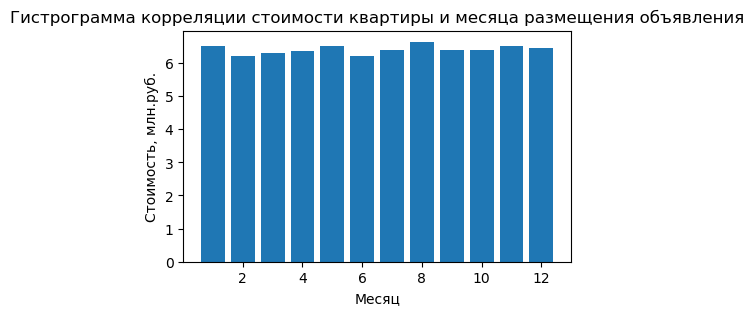

In [59]:
plt.figure(figsize=(5,3))
plt.bar(month_pivot_table.month, month_pivot_table.median_price)
plt.title("Гистрограмма корреляции стоимости квартиры и месяца размещения объявления")
plt.xlabel("Месяц")
plt.ylabel("Стоимость, млн.руб.");

In [60]:
year_pivot_table = spb_center_data.pivot_table(index='year_exposition', values='last_price', 
                                                         aggfunc=('mean', 'median', 'count')).reset_index()
year_pivot_table.columns = ['year', 'total', 'mean', 'median_price']
year_pivot_table

,year,total,mean,median_price
0,2015,77,6.312296,5.89
1,2016,308,6.507509,6.45
2,2017,1032,6.624001,6.49
3,2018,1028,6.610769,6.30
4,2019,346,6.697793,6.50


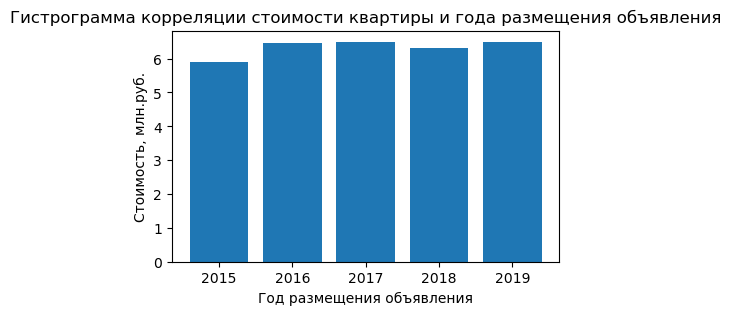

In [61]:
plt.figure(figsize=(5,3))
plt.bar(year_pivot_table.year, year_pivot_table.median_price)
plt.title("Гистрограмма корреляции стоимости квартиры и года размещения объявления")
plt.xlabel("Год размещения объявления")
plt.ylabel("Стоимость, млн.руб.");

Результаты совпали с данными по общей выборке.Из странностей - медианная стоимость квартир в центре в 2016-2019 гг. практически не повышается. Наверное, так дорого, что уже некуда повышать.

**Выводы**

В данном разделе был определён центральный район Санкт-Петербурга и проанализирован сегмент квартир данного района.

Зависимость цены от площади квартиры стала ещё сильнее. С возрастанием площади квартиры растёт и её цена. Убедились в этом с помощью определения коэффициента корреляции Пирсона и дополнительно подкрепили уверенность графиками и диаграммами.

Чем дальше от центра (даже в центре)- тем ниже стоимость квартиры. 

В среднем квартиры на первом этаже продаются дешевле остальных. Квартиры на последнем этаже тоже ценятся меньше, чем на других этажах.

Зависимость цены продажи квартиры от даты размещения объявления не наблюдается (даже от года размещения). В среднем стоимость квартир в центре Санкт-Петербурга вдвое выше квартир в среднем по городу и области.

# 4. Результаты исследования

В ходе данного исследования был проанализирован рынок недвижимости Санкт-Петербурга и прилегающих населённых пунктов за 2014-2019 гг.

Установлено, что из имеющихся в датасете параметров наибольшее влияние на стоимость квартиры оказывают её площадь, далее по значимости - удалённость от центра, количество комнат, этажность:
- Зависимость цены от площади квартиры самая сильная. Убедились в этом с помощью определения коэффициента корреляции Пирсона и дополнительно подкрепили уверенность графиками и диаграммами.
- Чем дальше от центра - тем ниже стоимость квартиры. Корреляция становится сильно выраженной при удалении квартиры от центра более, чем на 20 км.
- В среднем квартиры на первом этаже продаются дешевле остальных. Квартиры на последнем этаже тоже ценятся меньше, чем на других этажах.
- Зависимость цены продажи квартиры от даты размещения объявления не наблюдается. За исключением года размещения - очевидно, с каждым годом квартиры становятся дороже (как минимум на уровень инфляции).

В ходе анализа дат публикации объявлений определили, что медианное время продажи квартиры составляет 3 месяца. Небыстрое дело.

Также, в ходе работы были определен радиус объявлений центрального района Санкт-Петербурга и проанализирован сегмент квартир данного района. В целом квартиры из центра продаются в два раза дороже остальных квартир: средняя цена - 6,5 млн. руб. Для сравнения средняя цена по всем квартирам из датасета - 4-4,5 млн. руб.